Hi everyone, here is a notebook to give you a clearer idea of the project. Given the time constraints of the course we restricted certain aspects like the choice of dataset, we hope this framework remains flexible enough for you to get ideas. To recap, we have a set of EEG derived features from the  **Dortmund dataset** (n=607) https://www.nature.com/articles/s41597-024-03797-w.

These features have formerly been studied by averaging across the temporal dimension (see https://pmc.ncbi.nlm.nih.gov/articles/PMC10068296/ for a description of the features and an example of across time analysis). The approach should be data driven, so you are not expected to learn the details about each feature.

👉 Your goal would be to enable predictive studies **using the per-epoch, time-varying representation of the features**. Practically, this means reviewing suitable machine learning or deep learning models that can capture temporal dynamics. You can select one or several models and, if multiple are chosen, conduct a benchmark comparison. 

👉 About the task, **two target variables are available, age and sex**. You can either focus on one of them or try to develop a cross-task framework. If you pick only one variable, we recommend age as several benchmarks are available for it, for example see https://www.sciencedirect.com/science/article/pii/S105381192200636X.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data_epochs..npy
The data is in 2 numpy objects, containing subject * feature * time_sample * channel matrices.

In [2]:
data_epochs2 = np.load('data_epochs2.npy')
data_epochs8 = np.load('data_epochs8.npy')

In [3]:
print(f'data_epochs2: {np.shape(data_epochs2)}\ndata_epochs8: {np.shape(data_epochs8)}')

data_epochs2: (607, 60, 90, 64)
data_epochs8: (607, 12, 22, 64)


- It corresponds to features extracted from 180s long resting state EEG recordings, in 607 subjects, with 64 EEG channels (precisely session 1, acquisition pre, eyes-closed)
- **The time dimension is discrete, with the 60 features from data_epochs2 being computed on 2 seconds contiguous segments, and the 12 features from data_epochs8 on 8sec segments.**

👉 You can pick a method that accommodates both sampling rates or focus on data_epochs2.

👉 If you decide to reduce the channels dimension, make sure you still have a significant number of variables, for example reducing to approx 8 channels. Spatial patterns are not the focus of the project so don't use too sophisticated approaches if it takes you too much time.

👉 You are also free to reduce the features with whichever data driven approach you like.

📢 **Alternative topic** : we would also be interested in per feature topography clustering, using the actual channels location instead of treating the channels as independent. If you already have a pretty elaborate idea about this, we can discuss having you on a spatial project instead of the temporal one. 

# infos.csv
The infos.csv file will allow you to map the matrices dimensions with subjects' IDs and target variables, and with features and channels.

In [4]:
infos = pd.read_csv('infos.csv')
infos.head()

,subj,sex,age,features_epochs8,features_epochs2,channels
0,193,F,31,acw0,nl_sampling ent,Fp1
1,314,F,30,wt_alpha,nl_higuchi fractal dim,Fp2
2,33,M,32,lt_beta,envelope_mean_theta,F7
3,175,F,25,lt_gamma,kurtosis_amp_gamma,F3
4,245,F,56,acw50,nl_hjorth complexity,Fz


Note that the reading is not row wise for features_epochs8, features_epochs2, and channels : the rows just follow the order of the data_epochs matrices.

The mapping is :
- subj : dimension 0 of the data_epochs matrices
- features_epochs8 : dimension 1 of the data_epochs8 matrix ; features_epochs2 : dimension 1 of the data_epochs2 matrix
- channels : dimension 3 of the data_epochs matrices

The dimension 2, time, doesn't need mapping, segments are contiguous.

<u>Example :</u>
You can inspect subject_314's values of kurtosis_amp_gamma at channel Fp1 like this :

Text(0.5, 1.0, 'Subject 314, channel Fp1')

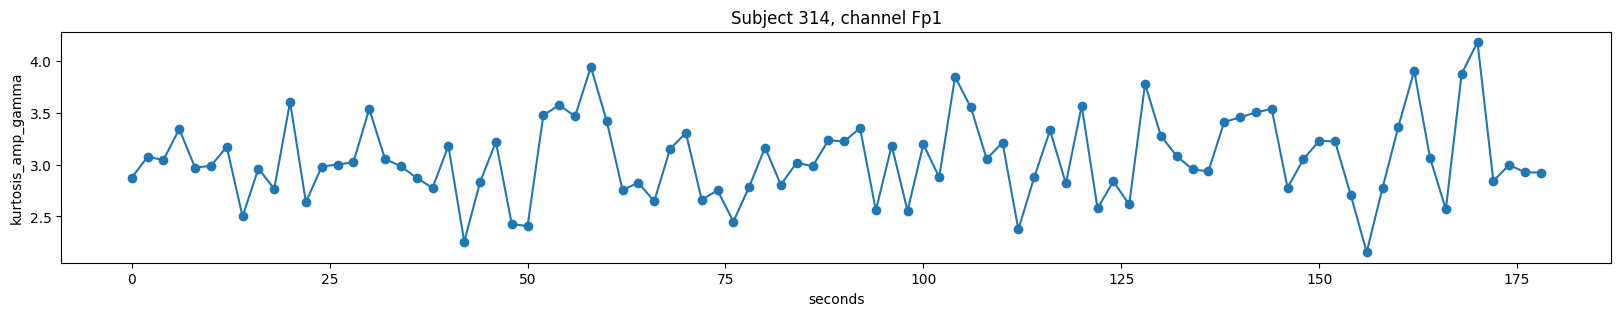

In [ ]:
subjidx = infos.index[infos['subj'] == 314]
featidx = infos.index[infos['features_epochs2'] == 'kurtosis_amp_gamma']
chanidx = infos.index[infos['channels'] == 'Fp1']

y = np.squeeze(data_epochs2[subjidx, featidx, :, chanidx])
# Since the data_epochs2 features are sampled over 2sec segments, the correct x axis is:
x = np.arange(len(y)) * 2

plt.figure(figsize = (20,3))
plt.plot(x, y, 'o-')
plt.ylabel('kurtosis_amp_gamma')
plt.xlabel('seconds')
plt.title('Subject 314, channel Fp1')

This gets you a visualization with time on the x-axis, so precisely the dimension you want to represent rather than reduce.

# Channel montage

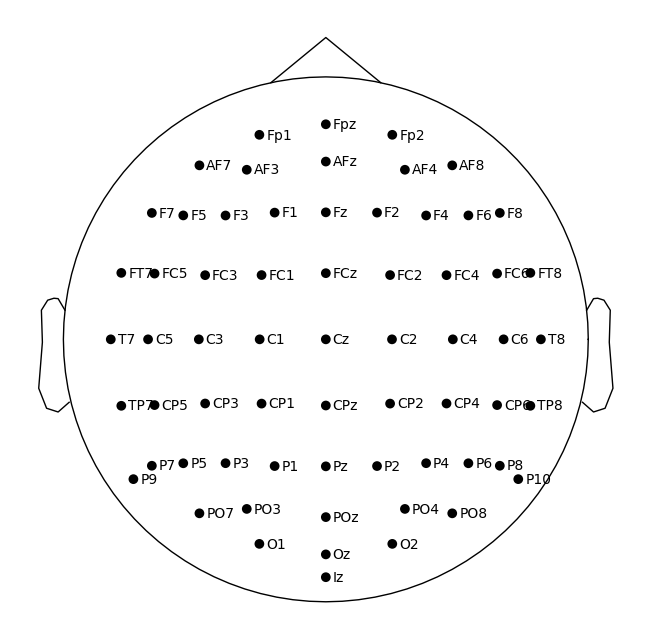

In [6]:
import mne

easycap_montage = mne.channels.make_standard_montage("biosemi64")
easycap_montage.plot();

And here is the channel montage, FYI.

Please email me if you have any questions.

👉 **Don't forget to fill the sign up Google Sheet if you are interested  https://docs.google.com/spreadsheets/d/1sIeJ3oD8QY1JgohkyVtNveRG9UWXHaEUkFW2qVvm2oY/edit?usp=sharing.**

In [4]:
dort = pd.read_csv("p1_dortmund.csv")
lemon = pd.read_csv("p1_lemon.csv")

print(f'p1_dortmund.csv: {np.shape(dort)}\np1_lemon.csv: {np.shape(lemon)}')

dort_cols = set(dort.columns)
lemon_cols = set(lemon.columns)

print("Features only in Dortmund:", dort_cols - lemon_cols)
print("Features only in LEMON:", lemon_cols - dort_cols)

# Print all column names
print("Dortmund columns:\n", list(dort.columns))
print("\nLEMON columns:\n", list(lemon.columns))


p1_dortmund.csv: (600, 148)
p1_lemon.csv: (190, 148)
Features only in Dortmund: set()
Features only in LEMON: set()
Dortmund columns:
 ['Unnamed: 0', 'nl_rqa mean diag length', 'kurtosis_amp_theta', 'lt_delta', 'envelope_mean_alpha', 'nl_correlation dim', 'kurtosis_amp_alpha', 'mod_index_theta-gamma', 'nl_rqa rte', 'nl_higuchi fractal dim', 'acw50', 'envelope_std_beta', 'wt_delta', 'mod_index_theta-beta', 'spec_ent_beta', 'wt_beta', 'spec_ent_delta', 'nl_lyapunov exponent', 'nl_katz fractal dim', 'mod_index_theta-alpha', 'total_power_theta', 'skewness_amp_theta', 'mod_index_alpha-beta', 'nl_rqa determinism', 'rel_amp_gamma', 'skewness_amp_gamma', 'spec_ent_gamma', 'nl_rqa laminarity', 'acw0', 'envelope_mean_beta', 'total_power_beta', 'kurtosis_amp_beta', 'spec_ent_theta', 'kurtosis_amp_gamma', 'wt_alpha', 'spec_ent_alpha', 'wt_theta', 'rel_amp_theta', 'envelope_std_theta', 'rel_amp_beta', 'total_power_alpha', 'skewness_amp_alpha', 'skewness_amp_beta', 'nl_hjorth mobility', 'lt_alpha', 